In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import sympy as sym
from sympy import init_printing, latex
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# True present value of a finite lease
def finite_lease_pv_true(T, g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return (x_0 * (1 - G**(T + 1) * R**(-T - 1))) / (1 - G * R**(-1))
# First approximation for our finite lease

def finite_lease_pv_approx_1(T, g, r, x_0):
    p = x_0 * (T + 1) + x_0 * r * g * (T + 1) / (r - g)
    return p

# Second approximation for our finite lease
def finite_lease_pv_approx_2(T, g, r, x_0):
    return (x_0 * (T + 1))

# Infinite lease
def infinite_lease(g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return x_0 / (1 - G * R**(-1))

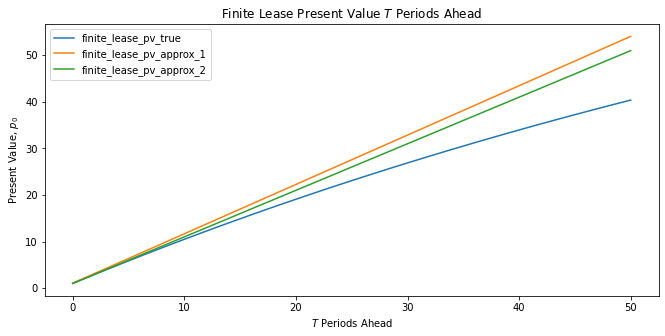

In [15]:
def plot_function(axes, x_vals, func, args):
    axes.plot(x_vals, func(*args), label=func.__name__)

T_max = 50

T = np.arange(0, T_max+1)
g = 0.02
r = 0.03
x_0 = 1

our_args = (T, g, r, x_0)
funcs = [finite_lease_pv_true,
        finite_lease_pv_approx_1,
        finite_lease_pv_approx_2]
        ## the three functions we want to compare

fig, ax = plt.subplots()
ax.set_title('Finite Lease Present Value $T$ Periods Ahead')
for f in funcs:
    plot_function(ax, T, f, our_args)
ax.legend()
ax.set_xlabel('$T$ Periods Ahead')
ax.set_ylabel('Present Value, $p_0$')
plt.show()

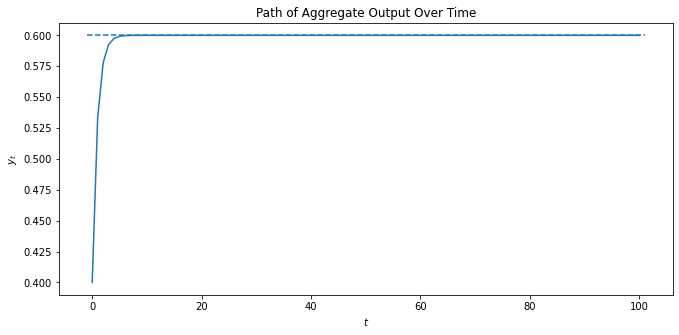

In [16]:
# Function that calculates a path of y
def calculate_y(i, b, g, T, y_init):
    y = np.zeros(T+1)
    y[0] = i + b * y_init + g
    for t in range(1, T+1):
        y[t] = b * y[t-1] + i + g
    return y

# Initial values
i_0 = 0.1
g_0 = 0.3
# 2/3 of income goes towards consumption
b = 1/3
y_init = 0
T = 100

_fig, ax = plt.subplots()
ax.set_title('Path of Aggregate Output Over Time')
ax.set_xlabel('$t$')
ax.set_ylabel('$y_t$')
ax.plot(np.arange(0, T+1), calculate_y(i_0, b, g_0, T, y_init))
# Output predicted by geometric series
ax.hlines(i_0 / (1 - b) + g_0 / (1 - b), xmin=-1, xmax=101, linestyles='--')
plt.show()